In [1]:
import pandas as pd
import numpy as np
from drfeelgood import biomart 
bm = biomart.Biomart()
import itertools
import matplotlib.pyplot as plt 
import scipy as sp
import scipy.linalg
import itertools

/Users/myrthedehaan/opt/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/Users/myrthedehaan/opt/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
df_go = pd.read_csv('goa_human.gaf', sep='\t', comment='!', names=['DB', 'DB_object_ID', 'DB_object_symbol', 'qualifier', 'GOID', 'DB:Reference', 'Evidence code', 'with(or)from', 'aspect', 'PB_object_name', 'DB_object_synonym', 'DB_object_type', 'taxon', 'date', 'assigned_by', 'annotation_extention', 'Gene_product_from_id'])

/Users/myrthedehaan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dt = pd.read_csv("mapped_DB_STITCH_actions_first.tsv", sep='\t')
dt['item_id_b'] = dt['item_id_b'].map(lambda x: x.lstrip('9606.'))
dt = dt[['CID', 'InChIKey', 'DrugBank ID', 'Name', 'item_id_b']].drop_duplicates()
        
dt['gName'] = list(map(bm.protein_to_name, list(dt['item_id_b'])))
dt = dt.dropna(subset=['gName'])
dt = dt[dt['gName'].isin(list(df_go.DB_object_symbol))]

In [4]:
chemdis = pd.read_csv('CTD_chemicals_diseases.tsv', sep='\t', comment='#', names=['ChemicalName','ChemicalID','CasRN','DiseaseName','DiseaseID','DirectEvidence','InferenceGeneSymbol','InferenceScore','OmimIDs','PubMedIDs'])
chemdisT = chemdis[chemdis['DirectEvidence'] == 'therapeutic']

chemgene = pd.read_csv('CTD_chem_gene_ixns.tsv', sep='\t', comment='#', names=['ChemicalName','ChemicalID','CasRN','GeneSymbol','GeneID','GeneForms','Organism','OrganismID','Interaction','InteractionActions','PubMedIDs'])
chemgeneH = chemgene[chemgene['Organism'] == 'Homo sapiens']
chemgeneH = chemgeneH.drop(columns=['ChemicalID', 'CasRN', 'OrganismID', 'PubMedIDs'])

THmerge = pd.merge(chemgeneH, chemdisT, on='ChemicalName')
THmerge = THmerge.drop_duplicates()

In [5]:
ngenes = len(set(df_go.DB_object_symbol))
gn = set(df_go.DB_object_symbol)
gl = list(df_go.DB_object_symbol)
GM = {n:i for i, n in enumerate(sorted(gn))}
gn

{'PDZD4',
 'FAM86C1',
 'MN1',
 'OR52H1',
 'NABP2',
 'B3GNT7',
 'SHISA7',
 'HSPG2',
 'A0A1W2PRG6',
 'HIST3H3',
 'CNST',
 'PARP16',
 'TNR',
 'YIF1A',
 'NFYC',
 'ADAM18',
 'CDK15',
 'SLC9B1P1',
 'RECQL4',
 'MAPK4',
 'CHRFAM7A',
 'SLC6A4',
 'POLR2D',
 'H7BZZ5',
 'Q6ZN92',
 'GJC3',
 'LCP1',
 'LY6D',
 'LMX1B',
 'MRPS6',
 'ENTPD3',
 'SLC25A17',
 'HIGD1B',
 'SLC39A10',
 'LINC00862',
 'PRPSAP2',
 'ABHD12',
 'ERVMER34-1',
 'PHYHIP',
 'MC3R',
 'DDX24',
 'COL27A1',
 'SOX10',
 'RNASET2',
 'ZNF772',
 'MTHFD1L',
 'SYT7',
 'AHCYL2',
 'SPIN2A',
 'SHCBP1L',
 'SEPTIN7',
 'MTRF1',
 'KCNK9',
 'PDLIM4',
 'JRKL',
 'CLINT1',
 'UBR7',
 'CCKAR',
 'IRX1',
 'FABP5P3',
 'ATP5PB',
 'POLDIP3',
 'ACOT8',
 'RASGRP4',
 'PHLDA1',
 'CXXC5',
 'TMCO4',
 'OR4C5',
 'SLC30A8',
 'MTRNR2L3',
 'RGS13',
 'DEFB123',
 'CCNJ',
 'AAGAB',
 'C2CD4B',
 'SF3B1',
 'PDGFB',
 'LCE3A',
 'OR5AN1',
 'HDAC2',
 'NAPEPLD',
 'HNRNPH2',
 'SPECC1L',
 'EZHIP',
 'NBPF9',
 'NDUFV3',
 'TRMT2A',
 'DUSP23',
 'PHF3',
 'CALCOCO1',
 'GRK5',
 'SOX9',
 'CCDC18

In [6]:
nb_drugs = len(GM)
dn = list(set(dt.Name))
end = len(dn) + nb_drugs
l_dg = []
for x in range(len(GM), end):
    l_dg.append(x)
DM = {i:n for i, n in zip(dn, l_dg)}

In [7]:
sdg = set(THmerge[THmerge['DiseaseName'] == 'Pulmonary Fibrosis'].GeneID)
protein_ids = list(set(map(bm.entrez_to_protein, sdg)))
protein_ids = [i for i in protein_ids if i]
gene_names = list(set(map(bm.protein_to_name, protein_ids)))
protein_h = set(gene_names) & set(gn)

In [8]:
ndrugs = len(set(dt.Name))

In [9]:
m = np.zeros((ngenes+ndrugs+1, ngenes+ndrugs+1), dtype=float)

In [10]:
m.shape

(22551, 22551)

In [11]:
gs = {r.GOID:[] for i,r in df_go.iterrows()}
for i,r in df_go.iterrows():
    gs[r.GOID].append(r.DB_object_symbol)

In [12]:
ts = {r.DB_object_symbol:[] for i,r in df_go.iterrows()}
for i,r in df_go.iterrows():
    ts[r.DB_object_symbol].append(r.GOID)

### Fill in the matrix

In [19]:
for i,r in gs.items():
    s = list(set(r))
    for x in range(len(s)):
        for y in range(len(s)):
            m[GM[s[x]], GM[s[y]]] += 1.0

In [20]:
for i,r in dt.iterrows():
    m[DM[r.Name], GM[r.gName]] = 1.0
    m[GM[r.gName], DM[r.Name]] = 1.0

In [21]:
for r in protein_h:
    m[-1, GM[r]] = 1.0
    m[GM[r], -1] = 1.0

In [22]:
#for i,r in gs.items():
#    s = list(set(r)) 
#    for x in range(len(s)):
#        for y in range(len(s)):
#            union = len(set(ts[s[x]]) | set(ts[s[y]])) 
#            m[GM[s[x]], GM[s[y]]] = m[GM[s[x]], GM[s[y]]] / union
for g in gn:
    for o in gn:
        union = len(set(ts[g]) | set(ts[o])) 
        m[GM[g], GM[o]] = m[GM[g], GM[o]] / union
        #print(GM[g])

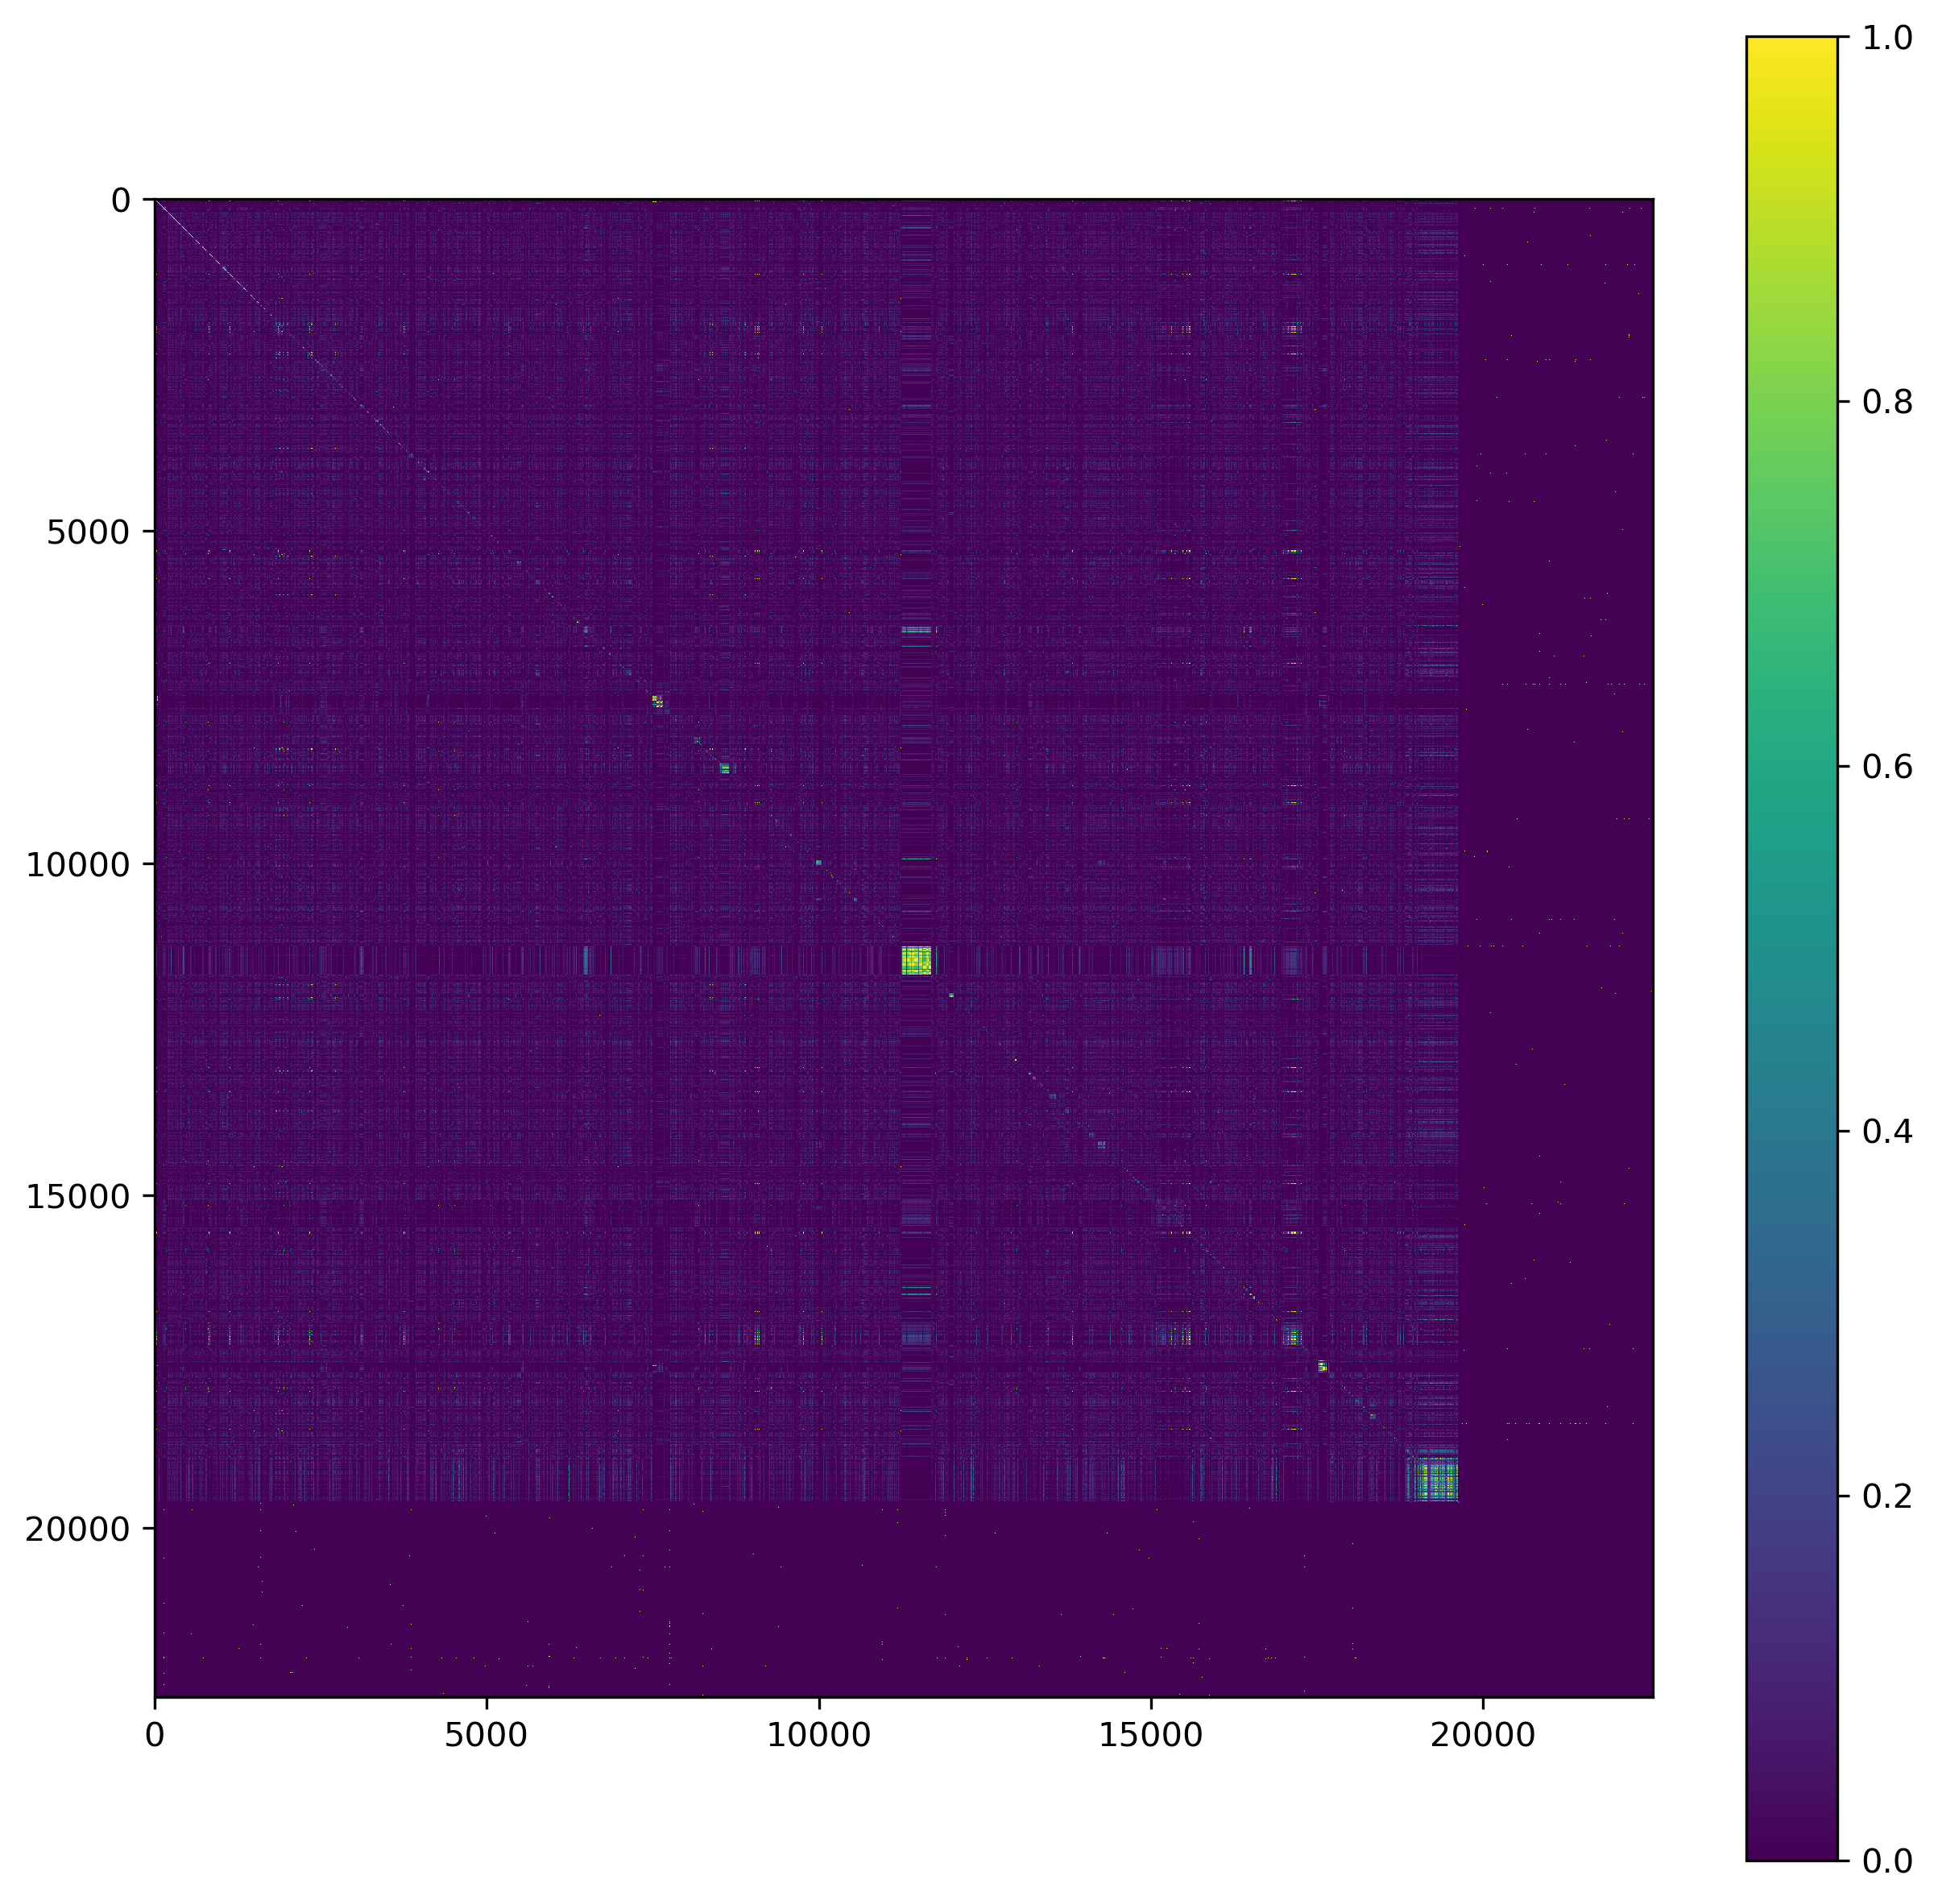

In [24]:
fig = plt.figure(figsize=(10,10), dpi=300)
plt.imshow(m)
plt.colorbar()
plt.show()
#m

### Diffusion

In [ ]:
S = np.zeros(m.shape[0])
S[-1] = 1

In [ ]:
def diffusion(M, beta=0.01):
    return sp.linalg.expm(beta*scipy.sparse.csgraph.laplacian(M))

In [ ]:
D = diffusion(m, beta=0.002)
D

In [ ]:
P = np.dot(S, D)
P

In [ ]:
nodes = list(gn) + list(dn) + ["Disease"]
print(nodes)

In [ ]:
heat_flow = list(zip(nodes, P))

In [ ]:
df = pd.DataFrame(heat_flow)
df.columns = ['Nodes', 'HeatFlow']

In [ ]:
drugsdf = df[df['Nodes'].isin(dn)]

In [ ]:
drugsdf['Ranking'] = drugsdf['HeatFlow'].rank(ascending=False)

In [ ]:
hoi = drugsdf.sort_values(by=['Ranking'], ascending=True)
hoi